In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## DATAFRAMES POR INSTANCIA

In [2]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')

# Separo las instancias
a_instance = df.iloc[:6]

b_instance = df.iloc[6:12]

e_instance = df.iloc[12:27]

real_instance = df.iloc[-1]

## INSTANCIAS POR COSTO

In [3]:
# COSTO DE CADA INSTANCIA
a_instance_cost = a_instance.iloc[:, 1::2]
a_instance_cost.insert(1, 'Vendedores', a_instance.iloc[:, 2])

b_instance_cost = b_instance.iloc[:, 1::2]
b_instance_cost.insert(1, 'Vendedores', b_instance.iloc[:, 2])

e_instance_cost = e_instance.iloc[:, 1::2]
e_instance_cost.insert(1, 'Vendedores', e_instance.iloc[:, 2])

## INSTANCIAS POR TIEMPO

In [4]:
# TIEMPO DE CADA INSTANCIA
a_instance_time = a_instance.iloc[:, 0::2]

b_instance_time = b_instance.iloc[:, 0::2]

e_instance_time = e_instance.iloc[:, 0::2]

In [9]:
# Print de las instancias
print('Instancia A')
print(a_instance_cost)

Instancia E
    Depositos  Vendedores  Greedy_cost  Binpacking_cost  Swap(Greedy)_cost   
12         40        1600       197314        1496530.0             172901  \
13         15         900        84262         681052.0              75287   
14         60         900       129004         868102.0             114588   
15         80        1600       241113        1563090.0             217047   
16         30         900       100800         807924.0              90889   
17         40         400        63010         368473.0              51004   
18         20        1600       153957        1350790.0             142486   
19         20         400        44255         320970.0              39421   
20         10         400        40090         272013.0              33945   
21          5         100        11103          53515.0               9785   
22         10         100        16598          64422.0              16381   
23         20         100        24449          6851

## GRAFICOS

### 1. COSTOS

<Axes: title={'center': 'Costo de las instancias E'}, xlabel='Vendedores', ylabel='Costo'>

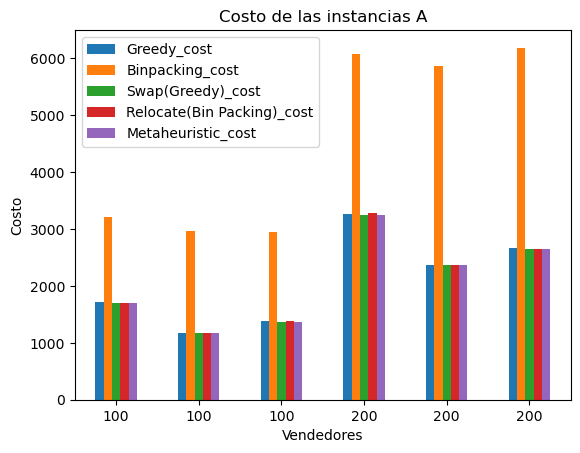

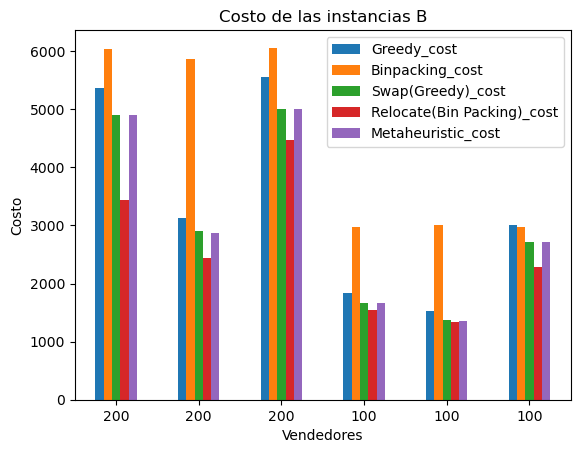

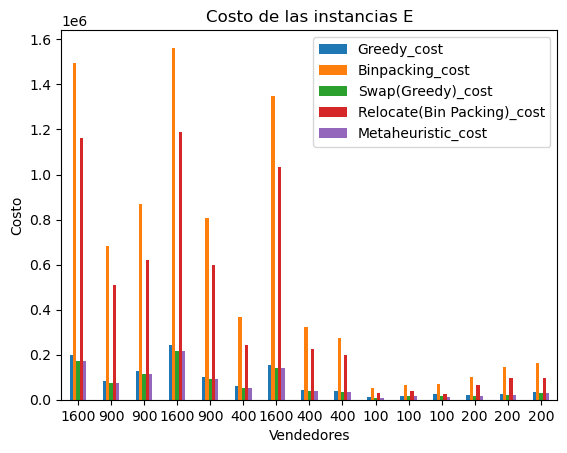

In [6]:
# GRAFICO DE BARRAS DE LOS COSTOS DE CADA ALGORITMO DE CADA INSTANCIA
a_instance_cost.iloc[:, 1:].plot(kind='bar', x='Vendedores', title='Costo de las instancias A', xlabel='Vendedores', ylabel='Costo', rot=0)
b_instance_cost.iloc[:, 1:].plot(kind='bar', x='Vendedores', title='Costo de las instancias B', xlabel='Vendedores', ylabel='Costo', rot=0)
e_instance_cost.iloc[:, 1:].plot(kind='bar', x='Vendedores', title='Costo de las instancias E', xlabel='Vendedores', ylabel='Costo', rot=0)

### 2. TIEMPOS

<Axes: title={'center': 'Tiempo de las instancias E'}, xlabel='Vendedores', ylabel='Tiempo (ms)'>

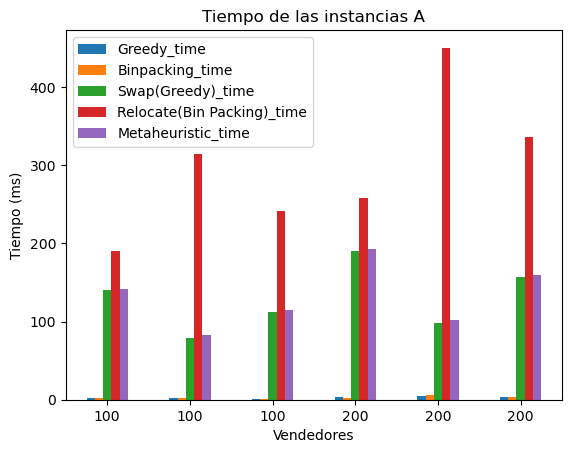

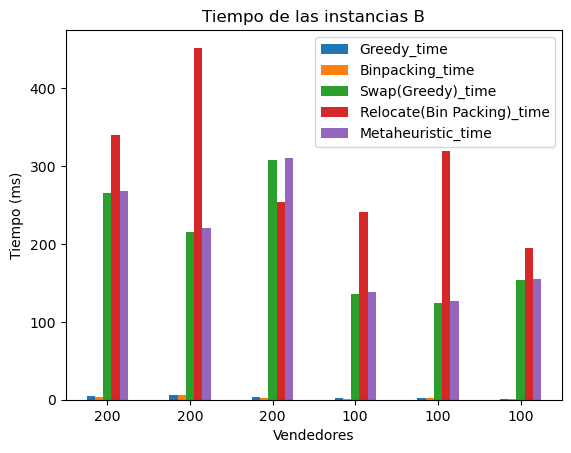

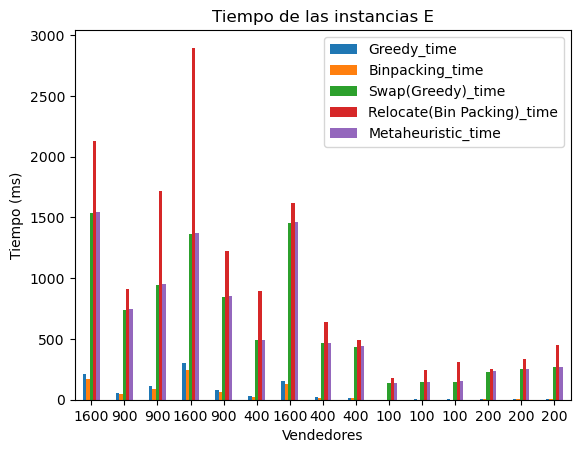

In [7]:
# # GRAFICO DE BARRAS DE LOS TIEMPOS DE CADA ALGORITMO DE CADA INSTANCIA
a_instance_time.iloc[:, 1:].plot(kind='bar', x='Vendedores', title='Tiempo de las instancias A', xlabel='Vendedores', ylabel='Tiempo (ms)', rot=0)
b_instance_time.iloc[:, 1:].plot(kind='bar', x='Vendedores', title='Tiempo de las instancias B', xlabel='Vendedores', ylabel='Tiempo (ms)', rot=0)
e_instance_time.iloc[:, 1:].plot(kind='bar', x='Vendedores', title='Tiempo de las instancias E', xlabel='Vendedores', ylabel='Tiempo (ms)', rot=0)

### 3. INSTANCIA REAL

* COSTO

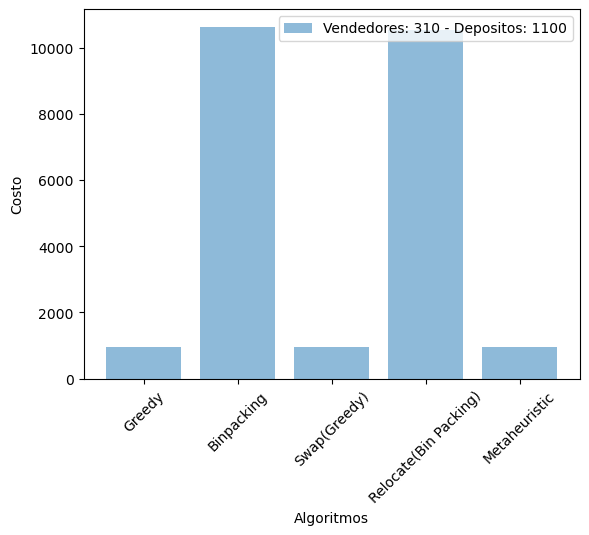

In [8]:
# Grafico de barras de los costos de los algoritmos
plt.bar(np.arange(len(real_instance[3::2])), real_instance[3::2], align='center', alpha=0.5)

plt.xticks(np.arange(len(real_instance[3::2])), [x[:-5] for x in real_instance.index[3::2]], rotation=45)

plt.ylabel('Costo')
plt.xlabel('Algoritmos')
plt.legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])
plt.show()

* TIEMPO

In [ ]:
# Grafico de barras de los tiempos de los algoritmos
plt.bar(np.arange(len(real_instance[4::2])), real_instance[4::2], align='center', alpha=0.5)

plt.xticks(np.arange(len(real_instance[4::2])), [x[:-5] for x in real_instance.index[4::2]], rotation=45)

plt.ylabel('Tiempo (ms)')
plt.xlabel('Algoritmos')
plt.legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])
plt.show()